<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Logistic Regression on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Introduction of Logistic Regression](#section401)<br>
    - 4.2 [Mathematics behind Logistic Regression](#section402)<br>
    - 4.3 [Applications of Logistic Regression](#section402)<br>
    - 4.4 [Preparing X and y using pandas](#section403)<br>
    - 4.5 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.6 [Logistic regression in scikit-learn](#section406)<br>
    - 4.7 [Using the Model for Prediction](#section407)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()


In [2]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

In [4]:
data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [6]:
# Finding the distribution of Embarked across unique values
data.groupby(['Embarked'])['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [7]:
data.Embarked.mode()

0    S
dtype: object

In [8]:
# Finding the mode of Embarked
data['Embarked'].mode()[0]

'S'

In [9]:
# Filling Null values of Embarked with its mode
data.Embarked = data.Embarked.fillna(data['Embarked'].mode())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.Age.fillna(data.Age.median(), inplace = True)
data.Fare.fillna(data.Fare.median(), inplace = True)

In [12]:
data.drop('Cabin', axis = 1,inplace = True)

In [13]:
data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  28.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
5      0            330877   8.4583        Q  
6      0             17463  51.8625        S  
7      1            349909  21.0750        S  
8      2            347742  11.1333        S  
9      0            237736  30.0708        C

In [14]:
# Creating a new feature/column : "Family Size". By adding the number of children and parents
data['FamilySize'] = data['SibSp'] + data['Parch']+1

In [15]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  
0      0         A/5 21171   7.2500        S           2  
1      0          PC 17599  71.2833        C           2  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           2  
4      0            373450   8.0500        S           1

- __Dropping__ columns __'Name' , 'Ticket'  , 'SibSp' , 'PassengerId' and 'Parch'__ 

In [16]:
drop_cols = ['Name','Ticket','SibSp','Parch','PassengerId']

In [17]:
data.drop(drop_cols, axis = 1, inplace=True)
data.head(10)

Survived  Pclass     Sex   Age     Fare Embarked  FamilySize
0         0       3    male  22.0   7.2500        S           2
1         1       1  female  38.0  71.2833        C           2
2         1       3  female  26.0   7.9250        S           1
3         1       1  female  35.0  53.1000        S           2
4         0       3    male  35.0   8.0500        S           1
5         0       3    male  28.0   8.4583        Q           1
6         0       1    male  54.0  51.8625        S           1
7         0       3    male   2.0  21.0750        S           5
8         1       3  female  27.0  11.1333        S           3
9         1       2  female  14.0  30.0708        C           2

## EDA

In [18]:
# how many people survived
data['Survived'].sum()

342

In [19]:
data.shape[0]

891

In [20]:
# % of people survived
data['Survived'].sum()/data.shape[0]

0.3838383838383838

In [21]:
# what is the distribution of male and female
data.groupby(['Sex'])['Sex'].count().sort_values(ascending=False)#.plot('bar')

Sex
male      577
female    314
Name: Sex, dtype: int64

In [22]:
# From where did the people embark
data.groupby(['Embarked'])['Embarked'].count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# How many people stayed in each of the classes
data.groupby(['Pclass'])['Pclass'].count().sort_values(ascending=False)

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
data.head()

Survived  Pclass     Sex   Age     Fare Embarked  FamilySize
0         0       3    male  22.0   7.2500        S           2
1         1       1  female  38.0  71.2833        C           2
2         1       3  female  26.0   7.9250        S           1
3         1       1  female  35.0  53.1000        S           2
4         0       3    male  35.0   8.0500        S           1

In [25]:
data.groupby(['Embarked'])['Survived'].sum().sort_values(ascending=False)

Embarked
S    217
C     93
Q     30
Name: Survived, dtype: int64

In [26]:
data.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [27]:
data.FamilySize.sum()

1697

In [28]:
(data.groupby(['Embarked'])['Survived'].sum()/data.groupby(['Embarked'])['Survived'].count()).plot(kind='bar')

In [29]:
data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

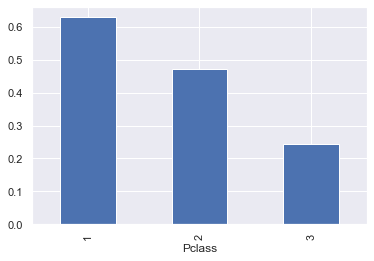

In [30]:
(data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count()).plot(kind='bar')

In [31]:
data['Fare'].mean()

32.2042079685746

In [32]:
#data['combination'] = data['Embarked'].astype(str) + '-' + data['Pclass'].astype(str)

In [33]:
data.head()

Survived  Pclass     Sex   Age     Fare Embarked  FamilySize
0         0       3    male  22.0   7.2500        S           2
1         1       1  female  38.0  71.2833        C           2
2         1       3  female  26.0   7.9250        S           1
3         1       1  female  35.0  53.1000        S           2
4         0       3    male  35.0   8.0500        S           1

In [34]:
data.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [35]:
data.groupby(['Survived'])['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

In [36]:
sns.pairplot(data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],\
                                                             hue="Survived", dropna=True, height = 3, aspect = 1.5)
plt.title('Pair Plot')

Text(0.5, 1.0, 'Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

# Creating dummy variables for our categorical variables

In [37]:
data.head()

Survived  Pclass     Sex   Age     Fare Embarked  FamilySize
0         0       3    male  22.0   7.2500        S           2
1         1       1  female  38.0  71.2833        C           2
2         1       3  female  26.0   7.9250        S           1
3         1       1  female  35.0  53.1000        S           2
4         0       3    male  35.0   8.0500        S           1

In [38]:
cat_cols = ['Sex','Embarked']

In [39]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [40]:
data_with_dummies.head()

Survived  Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  \
0         0       3  22.0   7.2500           2         1           0   
1         1       1  38.0  71.2833           2         0           0   
2         1       3  26.0   7.9250           1         0           0   
3         1       1  35.0  53.1000           2         0           0   
4         0       3  35.0   8.0500           1         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

Establishing __coorelation__ between all the features using __heatmap__.

In [41]:
corr = data_with_dummies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

Text(0.5, 1.0, 'Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- __Fare and FamilySize__ are __positively coorelated with Survived.__

<a id=section4></a>

## 4. Logistic Regression

<a id=section401></a>

### 4.1 Introduction to Logistic Regression

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known. <br/>For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__
Below is the pictorial representation of a basic logistic regression model to classify set of images into _happy or sad._
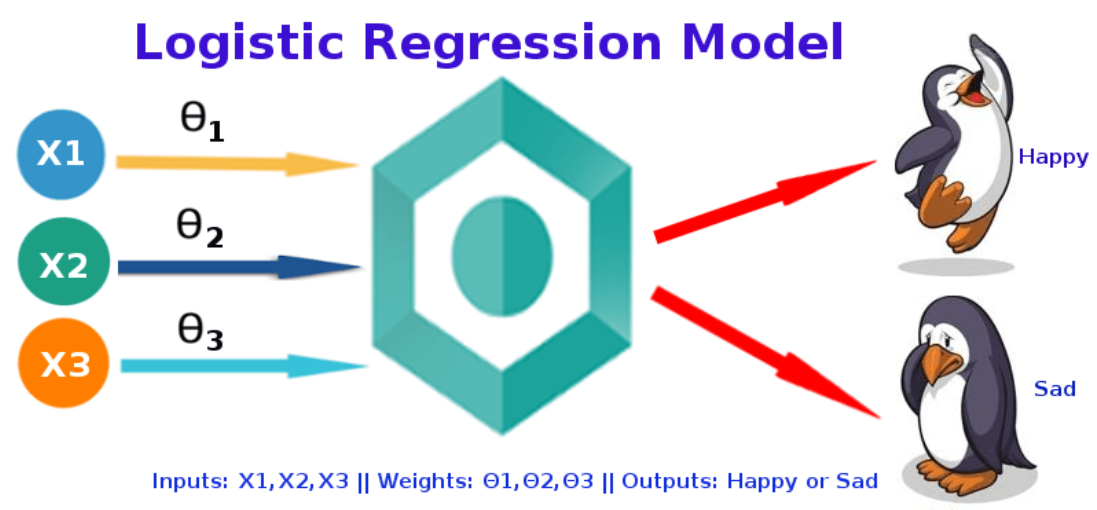

Both Linear regression and Logistic regression are __supervised learning techinques__. But for the _Regression_ problem the output is __continuous__ unlike the _classification_ problem where the output is __discrete__. <br/>
- Logistic Regression is used when the __dependent variable(target) is categorical__.<br/>
- __Sigmoid function__ or logistic function is used as _hypothesis function_ for logistic regression. Below is a figure showing the difference between linear regression and logistic regression, Also notice that logistic regression produces a logistic curve, which is limited to values between 0 and 1. <br/> 


<a id=section402></a>

## 4.2 Mathematics behind Logistic Regression

The __odds__ for an event is the __(probability of an event occuring) / (probability of event not occuring)__:

For __Linear regression__: continuous response is modeled as a linear combination of the features: __y = β0 + β1x__<br/>
For __Logistic regression__: log-odds of a categorical response being "__true__" (1) is modeled as a linear combination of the features:


This is called the __logit function__.<br/>
On solving for probability (p) you will get:

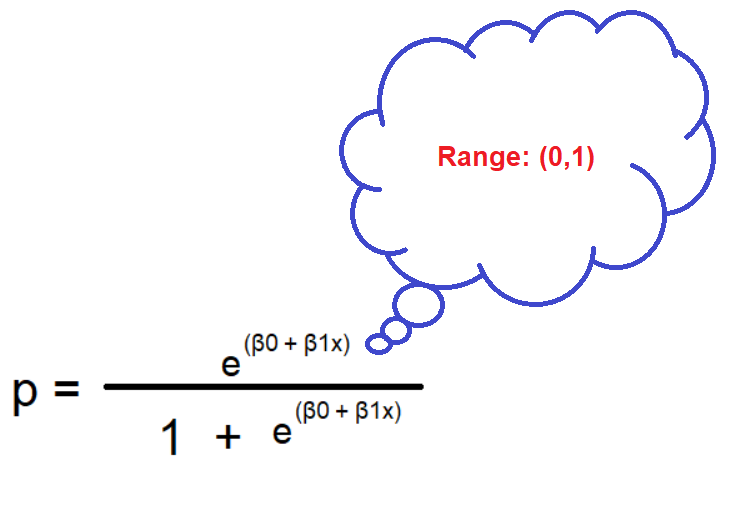


Shown below is the plot showing __linear model__ and __logistic model__: 

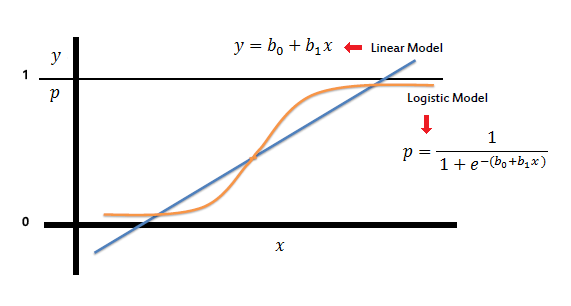


In other words:

- Logistic regression outputs the __probabilities of a specific class__.
- Those probabilities can be converted into __class predictions__.


The logistic function has some nice properties:

- Takes on an __"s"__ shape
- Output is bounded by __0 and 1__<br/>


We have covered how this works for binary classification problems (two response classes). But what about __multi-class classification problems__ (more than two response classes)?

- Most common solution for classification models is __"one-vs-all"__ (also known as __"one-vs-rest"__): decompose the problem into multiple binary classification problems.
- __Multinomial logistic regression__ can solve this as a single problem.

<a id=section403></a>

## 4.3 __Applications of Logistic Regression__

Logistic Regression was used in __biological sciences__ in early twentieth century. It was then used in many social science applications. For instance,
- The Trauma and Injury Severity Score (TRISS), which is widely used to __predict mortality in injured patients__, was originally developed by Boyd et al. using logistic regression.<br/> 
- Many other medical scales used to __assess severity__ of a patient have been developed using logistic regression.<br/>
- Logistic regression may be used to __predict the risk of developing a given disease__ (e.g. diabetes; coronary heart disease), based on observed characteristics of the patient (age, sex, body mass index, results of various blood tests, etc.).<br/>

Now a days, Logistic Regression have the following applications 
1. Image segementation and  categorization
2. Geographic image processing
3. Handwriting recognition
4. Detection of  myocardinal infarction
5. Predict whether a person is depressed or not based on a bag of words from corpus. 
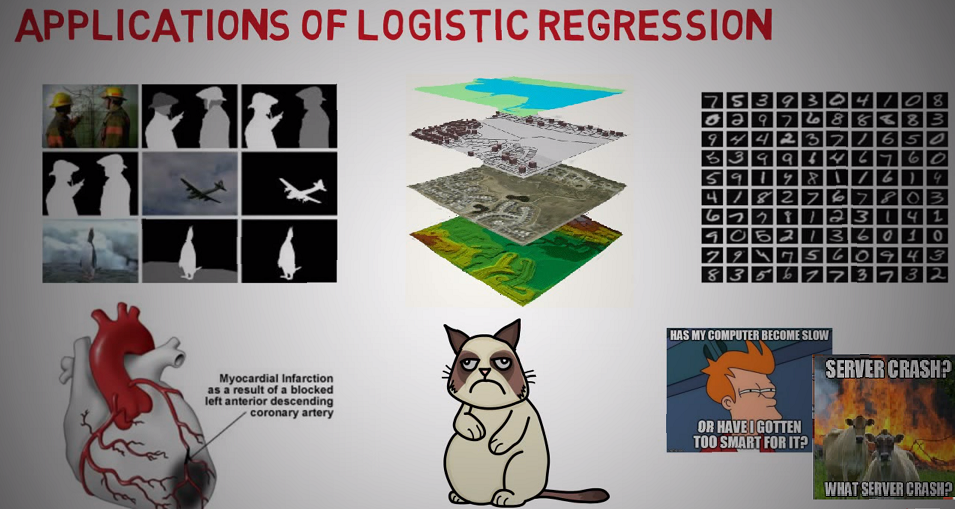

The reason why logistic regression is widely used despite of the state of the art of deep neural network is that logistic regression is very __efficient__ and does __not__ require too much __computational resources__, which makes it __affordable__ to run on production.

<a id=section404></a>

## 4.4 Preparing X and y using pandas

In [42]:
data_with_dummies.head()

Survived  Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  \
0         0       3  22.0   7.2500           2         1           0   
1         1       1  38.0  71.2833           2         0           0   
2         1       3  26.0   7.9250           1         0           0   
3         1       1  35.0  53.1000           2         0           0   
4         0       3  35.0   8.0500           1         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [43]:
data_with_dummies.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [44]:
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male','Embarked_Q', 'Embarked_S']

target = ['Survived']

In [45]:
X = data_with_dummies[features]
y = data_with_dummies[target]

<a id=section405></a>

## 4.5 Splitting X and y into training and test datasets.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [47]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (712, 7)
y_train shape:  (712, 1)

Test cases as below
X_test shape:  (179, 7)
y_test shape:  (179, 1)


<a id=section406></a>

## 4.6 Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    accuracy_score(y_test,y_pred_test))
    ```

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<a id=section407></a>

## 4.7 Using the Model for Prediction

In [49]:
y_pred_train = logreg.predict(X_train)  

In [50]:
print(y_pred_train)

[0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 0 1 0 1 

In [51]:
y_pred_test = logreg.predict(X_test)                 # make predictions on the testing set

In [52]:
print(y_pred_test)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1]


In [53]:
probabilities = logreg.predict_proba(X_test)

In [54]:
print(probabilities)

[[0.13334743 0.86665257]
 [0.9120089  0.0879911 ]
 [0.13167808 0.86832192]
 [0.33338461 0.66661539]
 [0.12377252 0.87622748]
 [0.88767167 0.11232833]
 [0.8588808  0.1411192 ]
 [0.09711627 0.90288373]
 [0.42772851 0.57227149]
 [0.36951159 0.63048841]
 [0.9022217  0.0977783 ]
 [0.41121036 0.58878964]
 [0.72389996 0.27610004]
 [0.76102495 0.23897505]
 [0.3334404  0.6665596 ]
 [0.49318277 0.50681723]
 [0.92017897 0.07982103]
 [0.91225334 0.08774666]
 [0.93391424 0.06608576]
 [0.30929493 0.69070507]
 [0.9236781  0.0763219 ]
 [0.88379144 0.11620856]
 [0.03885823 0.96114177]
 [0.6751558  0.3248442 ]
 [0.26179301 0.73820699]
 [0.90880788 0.09119212]
 [0.05684779 0.94315221]
 [0.28515811 0.71484189]
 [0.74695205 0.25304795]
 [0.0492377  0.9507623 ]
 [0.37386964 0.62613036]
 [0.49254326 0.50745674]
 [0.75211523 0.24788477]
 [0.44168076 0.55831924]
 [0.91770695 0.08229305]
 [0.44825572 0.55174428]
 [0.57026115 0.42973885]
 [0.91203921 0.08796079]
 [0.4037009  0.5962991 ]
 [0.88374923 0.11625077]


In [55]:
type(probabilities)

numpy.ndarray

In [56]:
probabilities_1 = probabilities[:,1]
probabilities_0 = probabilities[:,0]

In [57]:
print(probabilities_1)

[0.86665257 0.0879911  0.86832192 0.66661539 0.87622748 0.11232833
 0.1411192  0.90288373 0.57227149 0.63048841 0.0977783  0.58878964
 0.27610004 0.23897505 0.6665596  0.50681723 0.07982103 0.08774666
 0.06608576 0.69070507 0.0763219  0.11620856 0.96114177 0.3248442
 0.73820699 0.09119212 0.94315221 0.71484189 0.25304795 0.9507623
 0.62613036 0.50745674 0.24788477 0.55831924 0.08229305 0.55174428
 0.42973885 0.08796079 0.5962991  0.11625077 0.57937589 0.49888617
 0.83214871 0.34307312 0.49200167 0.06848312 0.05743387 0.17014771
 0.61345495 0.33294385 0.3173928  0.84956504 0.30764403 0.18695118
 0.08501133 0.56911198 0.23171039 0.22307898 0.02343569 0.64381353
 0.21209377 0.12481025 0.21270026 0.34716684 0.47997255 0.5773499
 0.12359043 0.13439387 0.75533786 0.11327139 0.07588465 0.06964504
 0.439063   0.0879911  0.58324671 0.23244421 0.90282124 0.12706199
 0.32255511 0.95894743 0.09713861 0.01922361 0.08799912 0.07097329
 0.88564628 0.08501049 0.08799912 0.12480995 0.54212386 0.7107660

In [58]:
X_test.head()

Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S
862       1  48.0  25.9292           1         0           0           1
223       3  28.0   7.8958           1         1           0           1
84        2  17.0  10.5000           1         0           0           1
680       3  28.0   8.1375           1         0           1           0
535       2   7.0  26.2500           3         0           0           1

In [59]:
test_predictions = X_test.copy()

In [60]:
test_predictions.head()

Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S
862       1  48.0  25.9292           1         0           0           1
223       3  28.0   7.8958           1         1           0           1
84        2  17.0  10.5000           1         0           0           1
680       3  28.0   8.1375           1         0           1           0
535       2   7.0  26.2500           3         0           0           1

In [61]:
test_predictions['actual'] = y_test

In [62]:
test_predictions['predicted'] = y_pred_test

In [63]:
test_predictions['probability'] = probabilities_1

In [64]:
test_predictions.head(20)

Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S  \
862       1  48.0  25.9292           1         0           0           1   
223       3  28.0   7.8958           1         1           0           1   
84        2  17.0  10.5000           1         0           0           1   
680       3  28.0   8.1375           1         0           1           0   
535       2   7.0  26.2500           3         0           0           1   
623       3  21.0   7.8542           1         1           0           1   
148       2  36.5  26.0000           3         1           0           1   
3         1  35.0  53.1000           2         0           0           1   
34        1  28.0  82.1708           2         1           0           0   
241       3  28.0  15.5000           2         0           1           0   
794       3  25.0   7.8958           1         1           0           1   
2         3  26.0   7.9250           1         0           0           1   
6         1  54.0  51.8625           1         1           0           1   
17        2  28.0  13.0000           1         1           0           1   
368       3  28.0   7.7500           1         0           1           0   
430       1  28.0  26.5500           1         1           0           1   
819       3  10.0  27.9000           6         1           0           1   
743       3  24.0  16.1000           2         1           0           1   
189       3  36.0   7.8958           1         1           0           1   
437       2  24.0  18.7500           6         0           0           1   

     actual  predicted  probability  
862       1          1     0.866653  
223       0          0     0.087991  
84        1          1     0.868322  
680       0          1     0.666615  
535       1          1     0.876227  
623       0          0     0.112328  
148       0          0     0.141119  
3         1          1     0.902884  
34        0          1     0.572271  
241       1          1     0.630488  
794       0          0     0.097778  
2         1          1     0.588790  
6         0          0     0.276100  
17        1          0     0.238975  
368       1          1     0.666560  
430       1          1     0.506817  
819       0          0     0.079821  
743       0          0     0.087747  
189       0          0     0.066086  
437       1          1     0.690705

Pclass   Age      Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S  \
414       3  44.0    7.9250           1         1           0           1   
267       3  25.0    7.7750           2         1           0           1   
81        3  29.0    9.5000           1         1           0           1   
107       3  28.0    7.7750           1         1           0           1   
643       3  28.0   56.4958           1         1           0           1   
692       3  28.0   56.4958           1         1           0           1   
821       3  27.0    8.6625           1         1           0           1   
65        3  28.0   15.2458           3         1           0           0   
509       3  26.0   56.4958           1         1           0           1   
622       3  20.0   15.7417           3         1           0           0   
828       3  28.0    7.7500           1         1           1           0   
207       3  26.0   18.7875           1         1           0           0   
17        2  28.0   13.0000           1         1           0           1   
187       1  45.0   26.5500           1         1           0           1   
599       1  49.0   56.9292           2         1           0           0   
85        3  33.0   15.8500           4         0           0           1   
512       1  36.0   26.2875           1         1           0           1   
724       1  27.0   53.1000           2         1           0           1   
827       2   1.0   37.0042           3         1           0           0   
8         3  27.0   11.1333           3         0           0           1   
815       1  28.0    0.0000           1         1           0           1   
813       3   6.0   31.2750           7         0           0           1   
729       3  25.0    7.9250           2         0           0           1   
415       3  28.0    8.0500           1         0           0           1   
34        1  28.0   82.1708           2         1           0           0   
119       3   2.0   31.2750           7         0           0           1   
772       2  57.0   10.5000           1         0           0           1   
452       1  30.0   27.7500           1         1           0           0   
766       1  28.0   39.6000           1         1           0           0   
49        3  18.0   17.8000           2         0           0           1   
882       3  22.0   10.5167           1         0           0           1   
404       3  20.0    8.6625           1         0           0           1   
680       3  28.0    8.1375           1         0           1           0   
702       3  18.0   14.4542           2         0           0           0   
111       3  14.5   14.4542           2         0           0           0   
205       3   2.0   10.4625           2         0           0           1   
498       1  25.0  151.5500           4         0           0           1   

     actual  predicted  probability  new_predictions_0.6  
414       1          0     0.049340                    0  
267       1          0     0.084277                    0  
81        1          0     0.085011                    0  
107       1          0     0.087985                    0  
643       1          0     0.090550                    0  
692       1          0     0.090550                    0  
821       1          0     0.091192                    0  
65        1          0     0.093706                    0  
509       1          0     0.097139                    0  
622       1          0     0.123590                    0  
828       1          0     0.127062                    0  
207       1          0     0.134394                    0  
17        1          0     0.238975                    0  
187       1          0     0.347167                    0  
599       1          0     0.368416                    0  
85        1          0     0.401965                    0  
512       1          0     0.429739                    0  
724       1     

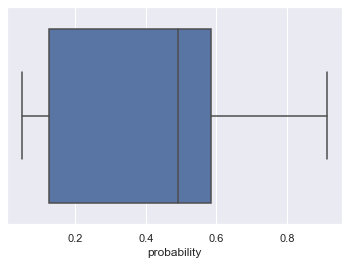

In [80]:
prob=test_predictions.loc[test_predictions['actual']!=test_predictions['predicted']].sort_values(by='probability')
display(prob)
sns.boxplot(prob['probability']);

In [66]:
test_predictions['new_predictions_0.6'] = 0

In [67]:
test_predictions.loc[test_predictions['probability']>=0.6,'new_predictions_0.6'] = 1

In [68]:
test_predictions.head(20)

Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S  \
862       1  48.0  25.9292           1         0           0           1   
223       3  28.0   7.8958           1         1           0           1   
84        2  17.0  10.5000           1         0           0           1   
680       3  28.0   8.1375           1         0           1           0   
535       2   7.0  26.2500           3         0           0           1   
623       3  21.0   7.8542           1         1           0           1   
148       2  36.5  26.0000           3         1           0           1   
3         1  35.0  53.1000           2         0           0           1   
34        1  28.0  82.1708           2         1           0           0   
241       3  28.0  15.5000           2         0           1           0   
794       3  25.0   7.8958           1         1           0           1   
2         3  26.0   7.9250           1         0           0           1   
6         1  54.0  51.8625           1         1           0           1   
17        2  28.0  13.0000           1         1           0           1   
368       3  28.0   7.7500           1         0           1           0   
430       1  28.0  26.5500           1         1           0           1   
819       3  10.0  27.9000           6         1           0           1   
743       3  24.0  16.1000           2         1           0           1   
189       3  36.0   7.8958           1         1           0           1   
437       2  24.0  18.7500           6         0           0           1   

     actual  predicted  probability  new_predictions_0.6  
862       1          1     0.866653                    1  
223       0          0     0.087991                    0  
84        1          1     0.868322                    1  
680       0          1     0.666615                    1  
535       1          1     0.876227                    1  
623       0          0     0.112328                    0  
148       0          0     0.141119                    0  
3         1          1     0.902884                    1  
34        0          1     0.572271                    0  
241       1          1     0.630488                    1  
794       0          0     0.097778                    0  
2         1          1     0.588790                    0  
6         0          0     0.276100                    0  
17        1          0     0.238975                    0  
368       1          1     0.666560                    1  
430       1          1     0.506817                    0  
819       0          0     0.079821                    0  
743       0          0     0.087747                    0  
189       0          0     0.066086                    0  
437       1          1     0.690705                    1

<a id = section5></a>

In [82]:
test_predictions['new_predictions_70']=0
test_predictions.loc[test_predictions['probability']>0.7,'new_predictions_70']=1

In [83]:
test_predictions.head()

Pclass   Age     Fare  FamilySize  Sex_male  Embarked_Q  Embarked_S  \
862       1  48.0  25.9292           1         0           0           1   
223       3  28.0   7.8958           1         1           0           1   
84        2  17.0  10.5000           1         0           0           1   
680       3  28.0   8.1375           1         0           1           0   
535       2   7.0  26.2500           3         0           0           1   

     actual  predicted  probability  new_predictions_0.6  new_predictions_70  
862       1          1     0.866653                    1                   1  
223       0          0     0.087991                    0                   0  
84        1          1     0.868322                    1                   1  
680       0          1     0.666615                    1                   0  
535       1          1     0.876227                    1                   1

In [86]:
test_predictions.loc[test_predictions['actual']!=test_predictions['new_predictions_70']].count()

Pclass                 44
Age                    44
Fare                   44
FamilySize             44
Sex_male               44
Embarked_Q             44
Embarked_S             44
actual                 44
predicted              44
probability            44
new_predictions_0.6    44
new_predictions_70     44
dtype: int64

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

<a id=section501></a>

### 5.1 Model Evaluation using __accuracy classification score__

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

<a id = section502></a>

### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
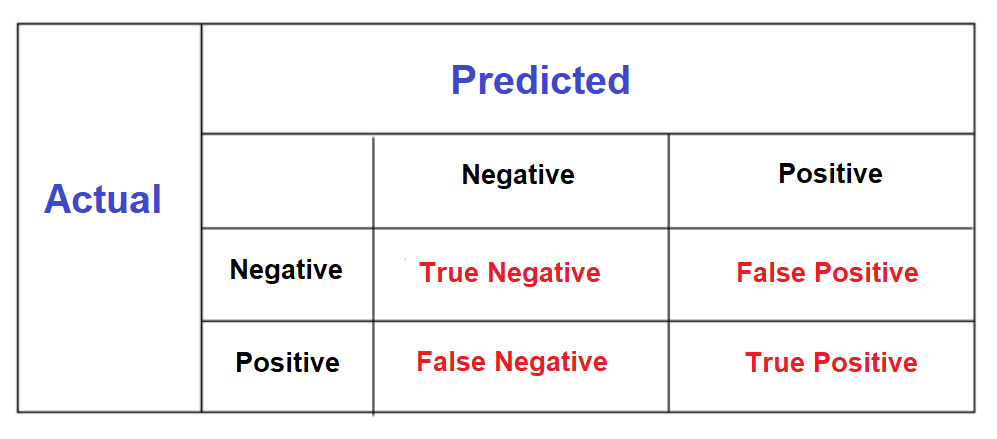

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix)


In [ ]:
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(c_matrix)

In [ ]:
c_matrix.index = ['Actual Died','Actual Survived']
c_matrix.columns = ['Predicted Died','Predicted Survived']
print(c_matrix)

This means 93 + 50 = __143 correct predictions__ & 23 + 13 = __36 false predictions__.